# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erahm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Read your api key environment variable
api_key = os.getenv("news_api")
api_key

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [6]:
# Fetch all the news about Bitcoin
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin", 
    language="en", 
    sort_by="relevancy")

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 7501


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Elizabeth Lopatto',
 'title': 'If you’re a Russian YouTuber, how do you get paid now?',
 'description': 'Russian creators are shut off from the global financial system. Some of them are turning to cryptocurrency.',
 'url': 'https://www.theverge.com/2022/3/17/22982122/russia-youtube-crypto-creators-pay-ruble',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3S_LG-y-r7iPmg=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/9442221/cryptocurrency_0004__00000_.jpg',
 'publishedAt': '2022-03-17T13:33:43Z',
 'content': 'When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]'}

In [7]:
# Fetch all the news about Ethereum
ethereum_headlines = newsapi.get_everything(
    q="Ethereum", 
    language="en", 
    sort_by="relevancy")

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]


Total articles about Ethereum: 3668


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Shanti Escalante-De Mattei',
 'title': 'Web3 Threatens to Segregate Our Online Lives',
 'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.',
 'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/',
 'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg',
 'publishedAt': '2022-03-01T14:00:00Z',
 'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'}

In [8]:
# Transform the response dictionary to a DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin_headlines["articles"])
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,https://www.theverge.com/2022/3/17/22982122/ru...,https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3...,2022-03-17T13:33:43Z,"When Russia invaded Ukraine, Niki Proshin was ..."
1,"{'id': None, 'name': 'Slashdot.org'}",EditorDavid,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...",https://news.slashdot.org/story/22/03/12/05412...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2022-03-12T18:34:00Z,"""Bitcoin was seen by many of its libertarian-l..."
2,"{'id': 'reuters', 'name': 'Reuters'}",None,CRYPTOVERSE-Bitcoin could be laid low by miner...,Bitcoin miners are feeling the heat - and the ...,https://www.reuters.com/markets/europe/cryptov...,https://www.reuters.com/resizer/9nBpgfg7pSfpPQ...,2022-02-22T06:17:00Z,Feb 22 (Reuters) - Bitcoin miners are feeling ...
3,"{'id': 'reuters', 'name': 'Reuters'}",None,Cryptoverse: Bitcoin gains conflict currency c...,Bitcoin has leapt since Russia's invasion of U...,https://www.reuters.com/markets/europe/cryptov...,https://www.reuters.com/pf/resources/images/re...,2022-03-01T06:10:00Z,March 1 (Reuters) - Bitcoin has leapt since Ru...
4,"{'id': 'wired', 'name': 'Wired'}",Gian M. Volpicelli,War Is Calling Crypto’s ‘Neutrality’ Into Ques...,War in Ukraine and Western sanctions against R...,https://www.wired.com/story/crypto-russia-ukra...,https://media.wired.com/photos/6226a83bd53a49d...,2022-03-08T12:00:00Z,Whose side is cryptocurrency on? If you had as...


In [9]:
# Transform the response dictionary to a DataFrame
ethereum_df = pd.DataFrame.from_dict(ethereum_headlines["articles"])
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Shanti Escalante-De Mattei,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,https://www.wired.com/story/web3-governance-to...,https://media.wired.com/photos/621d66c7ea3b8f2...,2022-03-01T14:00:00Z,"In February, shit hit the fan in the usual way..."
1,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,https://markets.businessinsider.com/news/curre...,https://i.insider.com/62190267d0009b001904bd96...,2022-02-25T17:02:30Z,Coinbase reported that the share of trading vo...
2,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,https://www.theverge.com/2022/2/26/22952357/uk...,https://cdn.vox-cdn.com/thumbor/teEVxppIZ_JTW-...,2022-02-26T20:29:04Z,Illustration by James Bareham / The Verge\r\n\...
3,"{'id': None, 'name': 'Entrepreneur'}",Masha Prusso,What You Need to Know About Ethereum's Role in...,This now-seven-year-old decentralized and open...,https://www.entrepreneur.com/article/417850,https://assets.entrepreneur.com/content/3x2/20...,2022-03-03T16:00:00Z,"It seems that in 2022, you cant escape from th..."
4,"{'id': 'wired', 'name': 'Wired'}",Omar L. Gallaga,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,https://www.wired.com/story/how-to-make-money-...,https://media.wired.com/photos/622bcc6ef48a924...,2022-03-13T13:00:00Z,"If it sounds too good to be true, youre not wr..."


In [10]:
# Create the Bitcoin sentiment scores DataFrame
_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        _sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sentiment_scores_df = pd.DataFrame(_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sentiment_scores_df = bitcoin_sentiment_scores_df[cols]

bitcoin_sentiment_scores_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
1,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
2,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887
3,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000
4,2022-03-08,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.091,0.854


In [11]:
# Create the Ethereum sentiment scores DataFrame
_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        _sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sentiment_scores_df = pd.DataFrame(_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_sentiment_scores_df = ethereum_sentiment_scores_df[cols]

ethereum_sentiment_scores_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
3,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.044,0.956
4,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713


In [12]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_scores_df.describe()

# Based on the Bitcoin Sentiment analysis, the overarching theme is neutral per the mean score of 91% in the 'describe' analysis below. 

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.023325,0.050050,0.050100,0.899750
std,0.407421,0.048176,0.062982,0.074986
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.267050,0.000000,0.000000,0.852500
50%,0.000000,0.051500,0.019000,0.902500
75%,0.344025,0.083500,0.085000,0.952500
max,0.636900,0.152000,0.187000,1.000000


In [13]:
# Describe the Ethereum Sentiment
ethereum_sentiment_scores_df.describe()

# Based on the Ethereum Sentiment analysis below, the overarching theme is also neutral per the mean score of 90% in the 'describe' analysis below.

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.214680,0.081850,0.026350,0.891750
std,0.406766,0.086321,0.039525,0.100824
min,-0.526700,0.000000,0.000000,0.692000
25%,0.000000,0.000000,0.000000,0.841000
50%,0.200950,0.068500,0.000000,0.910500
75%,0.526700,0.141500,0.052250,1.000000
max,0.834000,0.249000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score at 7%.

Q: Which coin had the highest compound score?

A: Ethereum also had the highest compound score at 16%.

Q. Which coin had the highest positive score?

A: Ethereum's max positive score of 25% far exceeded Bitcoin's max positive score of 15%.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [117]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import json
from nltk.corpus import reuters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\erahm\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erahm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
# Select a specific article from the bitcoin dataframe
bitcoin_article = pd.DataFrame.from_dict(bitcoin_headlines["articles"]).iloc[5]
bitcoin_article

source                              {'id': None, 'name': 'CNET'}
author                                            Julian Dossett
title          Is the US Developing a Digital Dollar? This We...
description    Nonfungible Tidbits: All the bitcoin, cryptocu...
url            https://www.cnet.com/personal-finance/crypto/i...
urlToImage     https://www.cnet.com/a/img/resize/e4de87a14a5e...
publishedAt                                 2022-03-19T13:15:02Z
content        Here's what happened this week in the crypto w...
Name: 5, dtype: object

In [118]:
# Select a specific article from the ethereum dataframe
ethereum_article = pd.DataFrame.from_dict(ethereum_headlines["articles"]).iloc[3]
ethereum_article

source                      {'id': None, 'name': 'Entrepreneur'}
author                                              Masha Prusso
title          What You Need to Know About Ethereum's Role in...
description    This now-seven-year-old decentralized and open...
url                  https://www.entrepreneur.com/article/417850
urlToImage     https://assets.entrepreneur.com/content/3x2/20...
publishedAt                                 2022-03-03T16:00:00Z
content        It seems that in 2022, you cant escape from th...
Name: 3, dtype: object

In [121]:
# Grab the content column in the bitcoin article
bitcoin_article_description = bitcoin_article['content']
bitcoin_article_description

"Here's what happened this week in the crypto world.\r\nGetty\r\nWelcome to Nonfungible Tidbits, a weekly roundup of news in crypto, NFTs and their related realms.\r\nOur lead story this week is the possibi… [+2860 chars]"

In [102]:
# Grab the content column in the ethereum article 
ethereum_article_description = ethereum_article['content']
ethereum_article_description

'It seems that in 2022, you cant escape from the metaverse.\xa0From Facebook to Microsoft, seemingly every centralized tech firm is clambering on the bandwagon of this emerging virtual reality. For puris… [+5412 chars]'

In [103]:
# Get a list of processed words for the bitcoin article
def tokenizer(bitcoin_article_description):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', bitcoin_article_description)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [108]:
# Print a list of the processed words for the bitcoin article
bitcoin_processed = tokenizer(bitcoin_article_description)
print(bitcoin_processed)

['heres', 'happened', 'week', 'crypto', 'worldgettywelcome', 'nonfungible', 'tidbits', 'weekly', 'roundup', 'news', 'crypto', 'nfts', 'related', 'realmsour', 'lead', 'story', 'week', 'possibi', 'char']


In [105]:
# Get a list of processed words for the ethereum article
def tokenizer(ethereum_article_description):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', ethereum_article_description)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [109]:
# Print a list of the processed words for the ethereum article
ethereum_processed = tokenizer(ethereum_article_description)
print(ethereum_processed)

['seems', 'cant', 'escape', 'metaversefrom', 'facebook', 'microsoft', 'seemingly', 'every', 'centralized', 'tech', 'firm', 'clambering', 'bandwagon', 'emerging', 'virtual', 'reality', 'puris', 'char']


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [30]:
from collections import Counter
from nltk import ngrams

In [132]:
# Generate the Bitcoin N-grams where N=2
bc_counts = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bc_counts))

{('heres', 'happened'): 1, ('happened', 'week'): 1, ('week', 'crypto'): 1, ('crypto', 'worldgettywelcome'): 1, ('worldgettywelcome', 'nonfungible'): 1, ('nonfungible', 'tidbits'): 1, ('tidbits', 'weekly'): 1, ('weekly', 'roundup'): 1, ('roundup', 'news'): 1, ('news', 'crypto'): 1, ('crypto', 'nfts'): 1, ('nfts', 'related'): 1, ('related', 'realmsour'): 1, ('realmsour', 'lead'): 1, ('lead', 'story'): 1, ('story', 'week'): 1, ('week', 'possibi'): 1, ('possibi', 'char'): 1}


In [133]:
# Generate the Ethereum N-grams where N=2
eth_counts = Counter(ngrams(ethereum_processed, n=2))
print(dict(eth_counts))

{('seems', 'cant'): 1, ('cant', 'escape'): 1, ('escape', 'metaversefrom'): 1, ('metaversefrom', 'facebook'): 1, ('facebook', 'microsoft'): 1, ('microsoft', 'seemingly'): 1, ('seemingly', 'every'): 1, ('every', 'centralized'): 1, ('centralized', 'tech'): 1, ('tech', 'firm'): 1, ('firm', 'clambering'): 1, ('clambering', 'bandwagon'): 1, ('bandwagon', 'emerging'): 1, ('emerging', 'virtual'): 1, ('virtual', 'reality'): 1, ('reality', 'puris'): 1, ('puris', 'char'): 1}


In [141]:
# Get Bitcoin word counts
bitcoin_word_counts = Counter(bitcoin_processed)
print(dict(bitcoin_word_counts)) 

{'heres': 1, 'happened': 1, 'week': 2, 'crypto': 2, 'worldgettywelcome': 1, 'nonfungible': 1, 'tidbits': 1, 'weekly': 1, 'roundup': 1, 'news': 1, 'nfts': 1, 'related': 1, 'realmsour': 1, 'lead': 1, 'story': 1, 'possibi': 1, 'char': 1}


In [142]:
# Get Ethereum word counts
ethereum_word_counts = Counter(ethereum_processed)
print(dict(ethereum_word_counts)) 

{'seems': 1, 'cant': 1, 'escape': 1, 'metaversefrom': 1, 'facebook': 1, 'microsoft': 1, 'seemingly': 1, 'every': 1, 'centralized': 1, 'tech': 1, 'firm': 1, 'clambering': 1, 'bandwagon': 1, 'emerging': 1, 'virtual': 1, 'reality': 1, 'puris': 1, 'char': 1}


In [143]:
# Print the top 10 most common bitcoin words
print(dict(bitcoin_word_counts.most_common(10)))

{'week': 2, 'crypto': 2, 'heres': 1, 'happened': 1, 'worldgettywelcome': 1, 'nonfungible': 1, 'tidbits': 1, 'weekly': 1, 'roundup': 1, 'news': 1}


In [144]:
# Print the top 10 most common ethereum words
print(dict(ethereum_word_counts.most_common(10)))

{'seems': 1, 'cant': 1, 'escape': 1, 'metaversefrom': 1, 'facebook': 1, 'microsoft': 1, 'seemingly': 1, 'every': 1, 'centralized': 1, 'tech': 1}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [36]:
# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
import spacy
from nltk.corpus import reuters
from spacy import displacy
import matplotlib.pyplot as plt 

# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

In [152]:
# Set ethereum article to be analyzed with spaCy
ethereum_doc = nlp(ethereum_article_description)

# Render NER visualization with displacy to determine entities for extraction
displacy.render(ethereum_doc, style="ent")

In [ ]:
# Join text into a single string and print the number of words in the Ethereum article content
ethereum_text = " ".join(review for review in ethereum_article.description.astype(str))
print("There are {} words in the column 'Description' of the Ethereum article.".format(len(ethereum_text)))

There are 3191 words in the column 'Description' of the Ethereum article.


In [150]:
# Define a set of stopwords using `stopwords.words()`
sw = set(stopwords.words('english'))
    
# Create custom stopwords
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

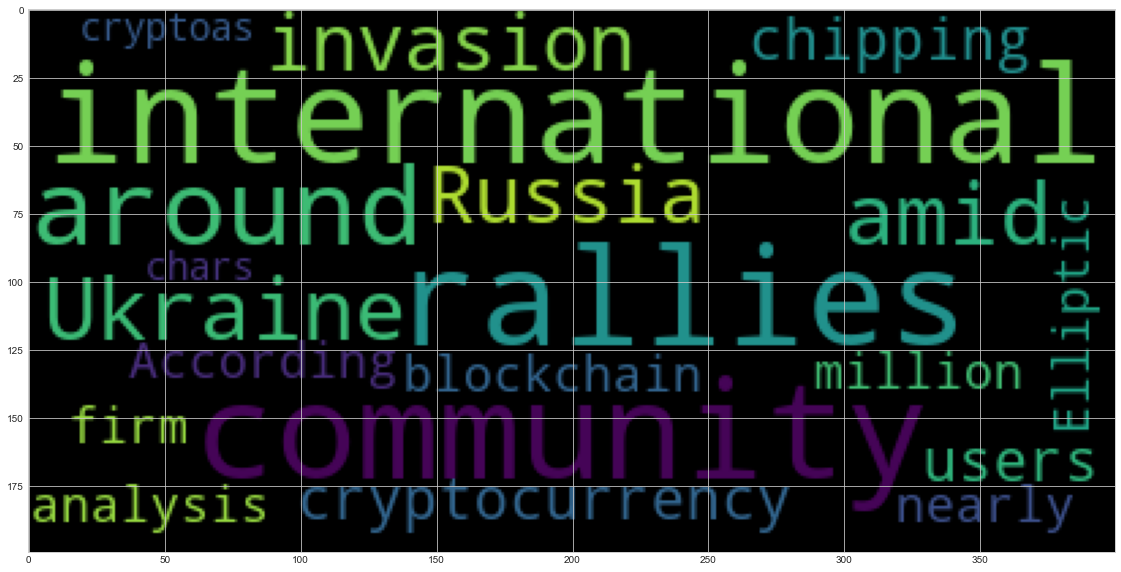

In [151]:
# Generate the Ethereum wordcloud
ethereum_wc = WordCloud().generate((text))
plt.imshow(ethereum_wc)

In [147]:
# Set bitcoin article to be analyzed with spaCy
bitcoin_doc = nlp(bitcoin_article_description)

# Render NER visualization with displacy to determine entities for extraction
displacy.render(bitcoin_doc, style="ent")

In [148]:
# Define a set of stopwords using `stopwords.words()`
sw = set(stopwords.words('english'))
    
# Create custom stopwords
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

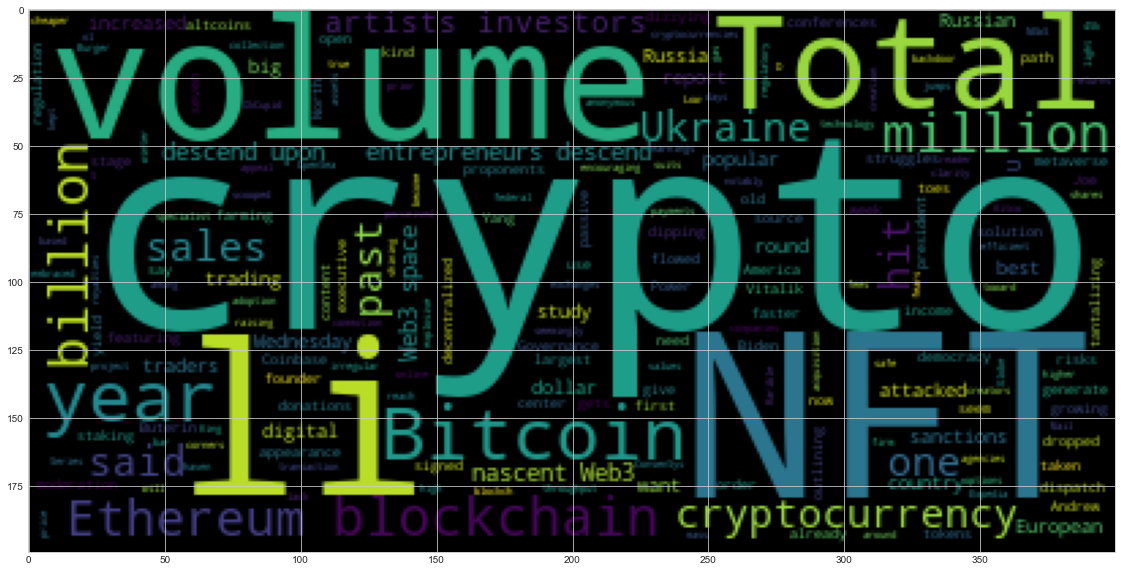

In [ ]:
# Generate the Bitcoin wordcloud
bitcoin_wc = WordCloud().generate((text))
plt.imshow(bitcoin_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [39]:
# Import required libraries
import spacy
from nltk.corpus import reuters
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()

True

In [40]:
# Load the English language model for spaCy
#!Python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [41]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erahm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
# Read in the News API key enviroment variable
api_key = os.getenv("news_api")

In [43]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [45]:
# Fetch all the news about Bitcoin
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",    
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0

Total articles: 7501


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Elizabeth Lopatto',
 'title': 'If you’re a Russian YouTuber, how do you get paid now?',
 'description': 'Russian creators are shut off from the global financial system. Some of them are turning to cryptocurrency.',
 'url': 'https://www.theverge.com/2022/3/17/22982122/russia-youtube-crypto-creators-pay-ruble',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3S_LG-y-r7iPmg=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/9442221/cryptocurrency_0004__00000_.jpg',
 'publishedAt': '2022-03-17T13:33:43Z',
 'content': 'When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]'}

In [46]:
# Fetch all the news about Ethereum
ethereum_headlines = newsapi.get_everything(
    q="Ethereum",    
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles: 3668


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Shanti Escalante-De Mattei',
 'title': 'Web3 Threatens to Segregate Our Online Lives',
 'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.',
 'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/',
 'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg',
 'publishedAt': '2022-03-01T14:00:00Z',
 'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'}

---
### Bitcoin NER

In [155]:
# Create a dataframe with all the bitcoin headlines
bitcoin_articles = pd.DataFrame.from_dict(bitcoin_headlines["articles"])
display(bitcoin_articles)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,https://www.theverge.com/2022/3/17/22982122/ru...,https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3...,2022-03-17T13:33:43Z,"When Russia invaded Ukraine, Niki Proshin was ..."
1,"{'id': None, 'name': 'Slashdot.org'}",EditorDavid,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...",https://news.slashdot.org/story/22/03/12/05412...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2022-03-12T18:34:00Z,"""Bitcoin was seen by many of its libertarian-l..."
2,"{'id': 'reuters', 'name': 'Reuters'}",None,CRYPTOVERSE-Bitcoin could be laid low by miner...,Bitcoin miners are feeling the heat - and the ...,https://www.reuters.com/markets/europe/cryptov...,https://www.reuters.com/resizer/9nBpgfg7pSfpPQ...,2022-02-22T06:17:00Z,Feb 22 (Reuters) - Bitcoin miners are feeling ...
3,"{'id': 'reuters', 'name': 'Reuters'}",None,Cryptoverse: Bitcoin gains conflict currency c...,Bitcoin has leapt since Russia's invasion of U...,https://www.reuters.com/markets/europe/cryptov...,https://www.reuters.com/pf/resources/images/re...,2022-03-01T06:10:00Z,March 1 (Reuters) - Bitcoin has leapt since Ru...
4,"{'id': 'wired', 'name': 'Wired'}",Gian M. Volpicelli,War Is Calling Crypto’s ‘Neutrality’ Into Ques...,War in Ukraine and Western sanctions against R...,https://www.wired.com/story/crypto-russia-ukra...,https://media.wired.com/photos/6226a83bd53a49d...,2022-03-08T12:00:00Z,Whose side is cryptocurrency on? If you had as...
...,...,...,...,...,...,...,...,...
95,"{'id': 'reuters', 'name': 'Reuters'}",None,EXCLUSIVE Russians liquidating crypto in the U...,Crypto firms in the United Arab Emirates (UAE)...,https://www.reuters.com/business/exclusive-rus...,https://www.reuters.com/resizer/2ehWZ21e81_-xs...,2022-03-11T16:03:00Z,"DUBAI, March 11 (Reuters) - Crypto firms in th..."
96,"{'id': None, 'name': 'Sans.edu'}",None,Scam Email – Impersonating Red Cross – Solicit...,SANS Internet Storm Center - A global cooperat...,https://isc.sans.edu/forums/diary/28404,https://isc.sans.edu/images/logos/isc/large.png,2022-03-05T10:25:59Z,"Earlier today, I received a scam email that im..."
97,"{'id': 'vice-news', 'name': 'Vice News'}","Ekin Genç, Jordan Pearson",The 'Freedom Convoy' Bitcoin Donations Have Be...,Bitcoin was supposed to be a financial lifelin...,https://www.vice.com/en/article/jgmnpd/the-fre...,https://video-images.vice.com/articles/6230aaa...,2022-03-15T15:12:48Z,As Canadian protests against vaccine mandates ...
98,"{'id': None, 'name': 'FOX 31 Denver'}",Dara Bitler,State of Colorado to accept Bitcoin for payments,Governor Jared Polis says Colorado will become...,https://kdvr.com/news/local/colorado-to-become...,https://kdvr.com/wp-content/uploads/sites/11/2...,2022-02-27T14:59:57Z,DENVER (KDVR) — Gov. Jared Polis says Colorado...


In [48]:
# Grab description column in bitcoin article 
bitcoin_articles_description = bitcoin_articles['description']
bitcoin_articles_description

0     Russian creators are shut off from the global ...
1     "Bitcoin was seen by many of its libertarian-l...
2     Bitcoin miners are feeling the heat - and the ...
3     Bitcoin has leapt since Russia's invasion of U...
4     War in Ukraine and Western sanctions against R...
                            ...                        
95    Crypto firms in the United Arab Emirates (UAE)...
96    SANS Internet Storm Center - A global cooperat...
97    Bitcoin was supposed to be a financial lifelin...
98    Governor Jared Polis says Colorado will become...
99    <ol><li>Gold, silver up but lose most of stron...
Name: description, Length: 100, dtype: object

In [49]:
# Concatenate all of the Bitcoin text together
concatentated_bitcoin_text = " ".join(review for review in bitcoin_articles_description.astype(str))
concatentated_bitcoin_text

'Russian creators are shut off from the global financial system. Some of them are turning to cryptocurrency. "Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance," argues a columnist in the New York Times, "a form of \'digital gold\' that would be a source of stability as the world grew more chaotic and unpredictable.... \n\n"But Bit… Bitcoin miners are feeling the heat - and the pain\'s rippling downstream to pressure prices. Bitcoin has leapt since Russia\'s invasion of Ukraine, bolstered by people in those countries looking to store and move money in anonymous and decentralised crypto. War in Ukraine and Western sanctions against Russia have made cryptocurrency a hot potato for international politics. Nonfungible Tidbits: All the bitcoin, cryptocurrency and NFT news for the week ending March 18. Nonfungible Tidbits: All the bitcoin, cryptocurrency and NFT news for the week ending March 6. Nearly $20 million has been raised in cryptocurrencies lik

In [153]:
# Run the NER processor on all of the bitcoin text
bitcoin_doc = nlp(concatentated_bitcoin_text)

# Render NER visualization with displacy
displacy.render(bitcoin_doc, style='ent')

In [157]:
# List all Entities
for token in bitcoin_doc:
    print(token.text, token.ent_iob_, token.ent_type_)

Russian B NORP
creators O 
are O 
shut O 
off O 
from O 
the O 
global O 
financial O 
system O 
. O 
Some O 
of O 
them O 
are O 
turning O 
to O 
cryptocurrency O 
. O 
" O 
Bitcoin O 
was O 
seen O 
by O 
many O 
of O 
its O 
libertarian O 
- O 
leaning O 
fans O 
as O 
a O 
kind O 
of O 
doomsday O 
insurance O 
, O 
" O 
argues O 
a O 
columnist O 
in O 
the B ORG
New I ORG
York I ORG
Times I ORG
, O 
" O 
a O 
form O 
of O 
' O 
digital O 
gold O 
' O 
that O 
would O 
be O 
a O 
source O 
of O 
stability O 
as O 
the O 
world O 
grew O 
more O 
chaotic O 
and O 
unpredictable O 
.... O 


 O 
" O 
But O 
Bit O 
… O 
Bitcoin O 
miners O 
are O 
feeling O 
the O 
heat O 
- O 
and O 
the O 
pain O 
's O 
rippling O 
downstream O 
to O 
pressure O 
prices O 
. O 
Bitcoin O 
has O 
leapt O 
since O 
Russia B GPE
's O 
invasion O 
of O 
Ukraine B GPE
, O 
bolstered O 
by O 
people O 
in O 
those O 
countries O 
looking O 
to O 
store O 
and O 
move O 
money O 
in O 
anonymous O 
and O

---

### Ethereum NER

In [52]:
# Create a dataframe with all the ethereum headlines
ethereum_articles = pd.DataFrame.from_dict(ethereum_headlines["articles"])
display(ethereum_articles)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Shanti Escalante-De Mattei,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,https://www.wired.com/story/web3-governance-to...,https://media.wired.com/photos/621d66c7ea3b8f2...,2022-03-01T14:00:00Z,"In February, shit hit the fan in the usual way..."
1,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,https://markets.businessinsider.com/news/curre...,https://i.insider.com/62190267d0009b001904bd96...,2022-02-25T17:02:30Z,Coinbase reported that the share of trading vo...
2,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,https://www.theverge.com/2022/2/26/22952357/uk...,https://cdn.vox-cdn.com/thumbor/teEVxppIZ_JTW-...,2022-02-26T20:29:04Z,Illustration by James Bareham / The Verge\r\n\...
3,"{'id': None, 'name': 'Entrepreneur'}",Masha Prusso,What You Need to Know About Ethereum's Role in...,This now-seven-year-old decentralized and open...,https://www.entrepreneur.com/article/417850,https://assets.entrepreneur.com/content/3x2/20...,2022-03-03T16:00:00Z,"It seems that in 2022, you cant escape from th..."
4,"{'id': 'wired', 'name': 'Wired'}",Omar L. Gallaga,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,https://www.wired.com/story/how-to-make-money-...,https://media.wired.com/photos/622bcc6ef48a924...,2022-03-13T13:00:00Z,"If it sounds too good to be true, youre not wr..."
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'MIT Technology Review'}",Amy Castor,Why Ethereum is switching to proof of stake an...,The market for NFTs—tokens that represent digi...,https://www.technologyreview.com/2022/03/04/10...,https://wp.technologyreview.com/wp-content/upl...,2022-03-04T10:00:00Z,"In Bitcoins proof of work, that investment is ..."
96,"{'id': None, 'name': 'Entrepreneur'}",Feras Moussa,The 5 Best High-Return Investments,With inflation now likely an enduring presence...,https://www.entrepreneur.com/article/420014,https://assets.entrepreneur.com/content/3x2/20...,2022-03-20T13:30:00Z,"When investing, everyone wants maximum returns..."
97,"{'id': None, 'name': 'MakeUseOf'}",Katie Rees,How Crypto Is Being Used to Aid Ukraine,Cryptocurrency donations are flooding into Ukr...,https://www.makeuseof.com/crypto-aid-ukraine/,https://static1.makeuseofimages.com/wordpress/...,2022-03-03T16:40:13Z,"In recent years, Ukraine has ramped up its cry..."
98,"{'id': 'business-insider', 'name': 'Business I...","rhouston@businessinsider.com (Rickie Houston, ...","Gate.io review: Trade more than 1,000 cryptocu...",Global crypto exchange Gate.io offers cryptocu...,https://www.businessinsider.com/personal-finan...,https://i.insider.com/6227a546dcce010019a73f6f...,2022-03-11T15:09:31Z,Bottom Line: Gate.io is best for individuals a...


In [53]:
# Grab description column in ethereum article 
ethereum_articles_description = ethereum_articles['description']
ethereum_articles_description

0     Governance tokens seem like a tantalizing solu...
1     Ethereum trading volume increased from 15% to ...
2     Millions of dollars of cryptocurrency have flo...
3     This now-seven-year-old decentralized and open...
4     Power traders use “staking” and “yield farming...
                            ...                        
95    The market for NFTs—tokens that represent digi...
96    With inflation now likely an enduring presence...
97    Cryptocurrency donations are flooding into Ukr...
98    Global crypto exchange Gate.io offers cryptocu...
99    ASIC mining machines are designed to mine cryp...
Name: description, Length: 100, dtype: object

In [54]:
# Concatenate all of the Ethereum text together
concatentated_ethereum_text = " ".join(review for review in ethereum_articles_description.astype(str))
concatentated_ethereum_text

'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy. Ethereum trading volume increased from 15% to 21% of Coinbase\'s total, and altcoins increased from 44% to 55%. Bitcoin dropped from 41% to 24%. Millions of dollars of cryptocurrency have flowed into Ukraine after it was attacked by Russia. Crypto was already popular — and proponents say it gets donations to those in need faster. This now-seven-year-old decentralized and open-source blockchain has taken center stage in the growing metaverse. Power traders use “staking” and “yield farming” to generate passive income, but there are risks. Total NFT sales volume hit $23 billion over the past year as artists, investors, and entrepreneurs descend upon the nascent Web3 space. A dispatch from a dizzying week at one of North America\'s largest cryptocurrency conferences, featuring Ethereum founder Vitalik Buterin and Andrew Yang. Joe Biden is dipping his toes into cr

In [154]:
# Run the NER processor on all of the ethereum text
ethereum_doc = nlp(concatentated_ethereum_text)

# Render NER visualization with displacy
displacy.render(ethereum_doc, style='ent')

In [156]:
# List all Entities
for token in ethereum_doc:
    print(token.text, token.ent_iob_, token.ent_type_)

Governance O 
tokens O 
seem O 
like O 
a O 
tantalizing O 
solution O 
to O 
content O 
moderation O 
struggles O 
. O 
They O 
only O 
give O 
the O 
appearance O 
of O 
democracy O 
. O 
Ethereum O 
trading O 
volume O 
increased O 
from O 
15 B PERCENT
% I PERCENT
to I PERCENT
21 I PERCENT
% I PERCENT
of O 
Coinbase B ORG
's O 
total O 
, O 
and O 
altcoins O 
increased O 
from O 
44 B PERCENT
% I PERCENT
to I PERCENT
55 I PERCENT
% I PERCENT
. O 
Bitcoin O 
dropped O 
from O 
41 B PERCENT
% I PERCENT
to I PERCENT
24 I PERCENT
% I PERCENT
. O 
Millions B MONEY
of I MONEY
dollars I MONEY
of O 
cryptocurrency O 
have O 
flowed O 
into O 
Ukraine B GPE
after O 
it O 
was O 
attacked O 
by O 
Russia B GPE
. O 
Crypto B PERSON
was O 
already O 
popular O 
— O 
and O 
proponents O 
say O 
it O 
gets O 
donations O 
to O 
those O 
in O 
need O 
faster O 
. O 
This O 
now O 
- O 
seven B DATE
- I DATE
year I DATE
- I DATE
old I DATE
decentralized O 
and O 
open O 
- O 
source O 
blockchain

---